# Tutorial 1

**Credits**: Andrea Galassi, Federico Ruggeri, Eleonora Mancini, Paolo Torroni

**Keywords**: Data loading, Feature Extraction, Machine Learning, Text Classification, Text Regression, Sentiment Analysis

# Contact

For any doubt, question, issue or help, you can always contact us at the following email addresses:

Teaching Assistants:

* Federico Ruggeri -> federico.ruggeri6@unibo.it
* Eleonora Mancini -> e.mancini@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it

## Important

**Make sure** to put all of us in cc when contacting us via mail!

## PART I ($\sim$25 mins)

*   How to **download** a dataset.
*   How to **inspect** a dataset.

## PART II ($\sim$25 mins)

* How to perform basic **text pre-processing** to identify input features.

## PART III ($\sim$25 mins)

*   How to **train a classifier** on identified input features for sentiment classification.
*   How to **evaluate** model performance and **inspect** its predictions.

## PART IV ($\sim$25 mins)

*   How to **train a regressor** on identified input features for sentiment score prediction.
*   How to **evaluate** model performance and **inspect** its predictions.

## Task

We consider the task of **document classification**.

Specifically, we consider document **sentiment analysis** on movie reviews.

## Preliminaries

First of all, we need to import some useful packages that we will use during this hands-on session.

In [1]:
# file management
import sys
import os
import shutil
from urllib import request
import tarfile
from pathlib import Path

# dataframe management
import pandas as pd

# data manipulation
import numpy as np

# for readability
from typing import Iterable
from tqdm import tqdm

In [2]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

{'width': 1024, 'height': 768, 'scroll': True}

# 1. Downloading the dataset

We download the IMDB movie reviews dataset.

In [3]:
def download_dataset(download_path: Path, url: str):
    if not download_path.exists():
        print("Downloading dataset...")
        request.urlretrieve(url, download_path)
        print("Download complete!")

def extract_dataset(download_path: Path, extract_path: Path):
    if not extract_path.exists():
        print("Extracting dataset... (it may take a while...)")
        with tarfile.open(download_path) as loaded_tar:
            loaded_tar.extractall(extract_path)
        print("Extraction completed!")

In [4]:
url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

print(f"Current work directory: {Path.cwd()}")
dataset_folder = Path.cwd().joinpath("Datasets")

if not dataset_folder.exists():
    dataset_folder.mkdir(parents=True)

dataset_path = dataset_folder.joinpath("Movies.tar.gz")

download_dataset(dataset_path, url)
extract_dataset(dataset_path, dataset_folder)

Current work directory: /home/frgg/Repositories/nlp-course-material/2023-2024/Tutorial 1


Let's have a look at the files we have downloaded to understand the dataset structure.

In [5]:
dataset_name = "aclImdb"

# an example
file_path = dataset_folder.joinpath(dataset_name, 'train', 'pos', "0_9.txt")

if file_path.is_file():
    # open the file
    with file_path.open(mode='r', encoding='utf-8') as text_file:
        text = text_file.read()
        print(text)

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


## 1.1 Encode the dataset into a pandas.DataFrame

We encode the loaded dataset into a dataframe to better access to its content.

In [6]:
dataframe_rows = []

for split in ['train', 'test']:
    for sentiment in ['pos', 'neg']:
        folder = dataset_folder.joinpath(dataset_name, split, sentiment)
        for file_path in folder.glob('*.txt'):            
            with file_path.open(mode='r', encoding='utf-8') as text_file:
                text = text_file.read()
                score = file_path.stem.split("_")[1]
                score = int(score)
                file_id = file_path.stem.split("_")[0]

                num_sentiment = 1 if sentiment == 'pos' else 0

                dataframe_row = {
                    "file_id": file_id,
                    "score": score,
                    "sentiment": num_sentiment,
                    "split": split,
                    "text": text
                }

                dataframe_rows.append(dataframe_row)

In [7]:
folder = Path.cwd().joinpath("Datasets", "Dataframes", dataset_name)
if not folder.exists():
    folder.mkdir(parents=True)

# transform the list of rows in a proper dataframe
df = pd.DataFrame(dataframe_rows)
df = df[["file_id", 
         "score",
         "sentiment",
         "split",
         "text"]
       ]
df_path = folder.with_name(dataset_name + ".pkl")
df.to_pickle(df_path)

## 1.2 Inspecting the dataset

We first have a look at the dataframe structure.

In [8]:
print("Dataframe structure:")
print(df)
print()

print("Total rows %d" % (len(df)))
print()

Dataframe structure:
      file_id  score  sentiment  split  \
0        3778     10          1  train   
1        3212      7          1  train   
2       11982      7          1  train   
3       10218      8          1  train   
4         632     10          1  train   
...       ...    ...        ...    ...   
49995    8169      2          0   test   
49996   12190      1          0   test   
49997    8335      1          0   test   
49998    4705      4          0   test   
49999    5086      4          0   test   

                                                    text  
0      The first film had little ambition so nothing ...  
1      I've watched this movie a second time to try t...  
2      This is how I feel about the show.<br /><br />...  
3      We have to remember that the 50's were practic...  
4      OK here is how I do this. I grade movies on 10...  
...                                                  ...  
49995  Watching "Baghban" is the movie equivalent of ...  
49

In [9]:
print("Distribution of scores: ")
print(df['score'].value_counts())
print()

print("Distribution of sentiment: ")
print(df['sentiment'].value_counts())
print()

print("Distribution of splits: ")
print(df['split'].value_counts())
print()

Distribution of scores: 
1     10122
10     9731
8      5859
4      5331
3      4961
7      4803
9      4607
2      4586
Name: score, dtype: int64

Distribution of sentiment: 
1    25000
0    25000
Name: sentiment, dtype: int64

Distribution of splits: 
train    25000
test     25000
Name: split, dtype: int64



In [10]:
print("Distribution of sentiments in split: ")
print(df.groupby(['split','sentiment']).size())
print()

print("Distribution of scores in split: ")
print(df.groupby(['split','score']).size())
print()

print("Differences in score distribution in split: ")
print(df.groupby(['score','split',]).size())
print()

Distribution of sentiments in split: 
split  sentiment
test   0            12500
       1            12500
train  0            12500
       1            12500
dtype: int64

Distribution of scores in split: 
split  score
test   1        5022
       2        2302
       3        2541
       4        2635
       7        2307
       8        2850
       9        2344
       10       4999
train  1        5100
       2        2284
       3        2420
       4        2696
       7        2496
       8        3009
       9        2263
       10       4732
dtype: int64

Differences in score distribution in split: 
score  split
1      test     5022
       train    5100
2      test     2302
       train    2284
3      test     2541
       train    2420
4      test     2635
       train    2696
7      test     2307
       train    2496
8      test     2850
       train    3009
9      test     2344
       train    2263
10     test     4999
       train    4732
dtype: int64



In [11]:
print("Differences among score classes in the splits: ")
print(df.groupby(['sentiment','score','split']).size())
print()

Differences among score classes in the splits: 
sentiment  score  split
0          1      test     5022
                  train    5100
           2      test     2302
                  train    2284
           3      test     2541
                  train    2420
           4      test     2635
                  train    2696
1          7      test     2307
                  train    2496
           8      test     2850
                  train    3009
           9      test     2344
                  train    2263
           10     test     4999
                  train    4732
dtype: int64



### 1.2.1 Visualization

In [12]:
# Preliminaries
import matplotlib.pyplot as plt

We first visualize sentiment class distribution.

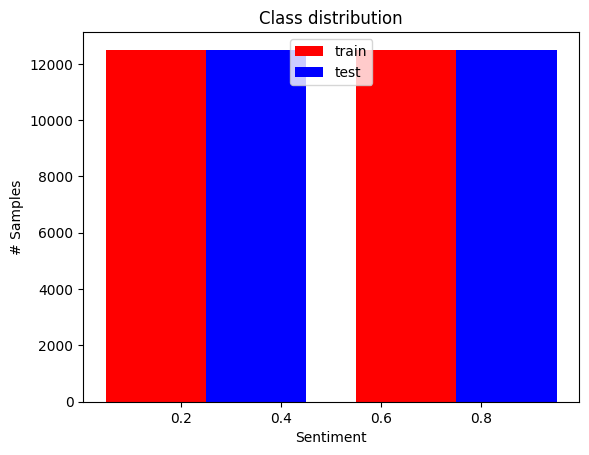

In [13]:
train_labels = df[df.split == 'train'].sentiment.values
test_labels = df[df.split == 'test'].sentiment.values

plt.hist([train_labels,test_labels], bins=2, label=['train','test'], color=["red", "blue"], align="mid")
plt.legend(loc='upper center')
plt.title('Class distribution')
plt.xlabel('Sentiment')
plt.ylabel('# Samples')
plt.show()

Then we visualize sentiment scores.

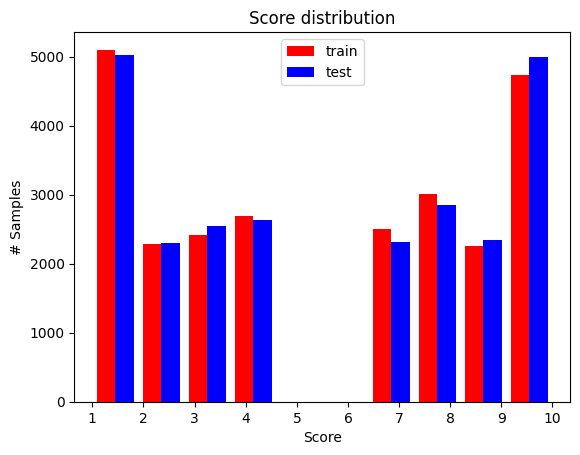

In [14]:
train_scores = df[df.split == 'train'].score.values
test_scores = df[df.split == 'test'].score.values

plt.xticks(range(1,11))
plt.hist([train_scores,test_scores], bins=10, label=['train','test'], color=["red", "blue"], align="mid")
plt.legend(loc='upper center')
plt.title('Score distribution')
plt.xlabel('Score')
plt.ylabel('# Samples')

plt.show()

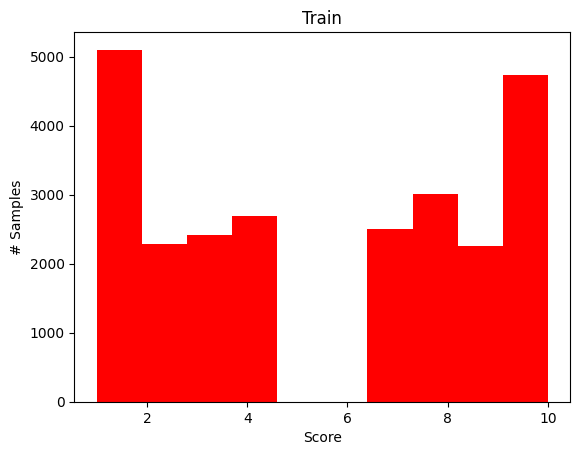

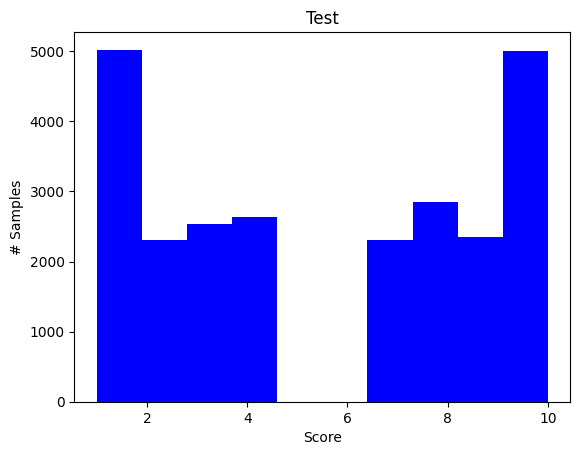

In [17]:
plot1 = plt.figure(1)
plt.hist(train_scores, 10, color="red")
plt.xlabel('Score')
plt.ylabel('# Samples')
plt.title("Train")

plot2 = plt.figure(2)
plt.hist(test_scores, 10, color="blue")
plt.xlabel('Score')
plt.ylabel('# Samples')
plt.title("Test")

plt.show()

Lastly, we check text length distribution.

In [19]:
from nltk.tokenize import word_tokenize

train_texts = df[df.split == 'train'].text.values
test_texts = df[df.split == 'test'].text.values

train_lengths = [len(word_tokenize(text)) for text in tqdm(train_texts)]
test_lengths = [len(word_tokenize(text)) for text in tqdm(test_texts)]

100%|███████████████████████████████████| 25000/25000 [00:16<00:00, 1498.49it/s]


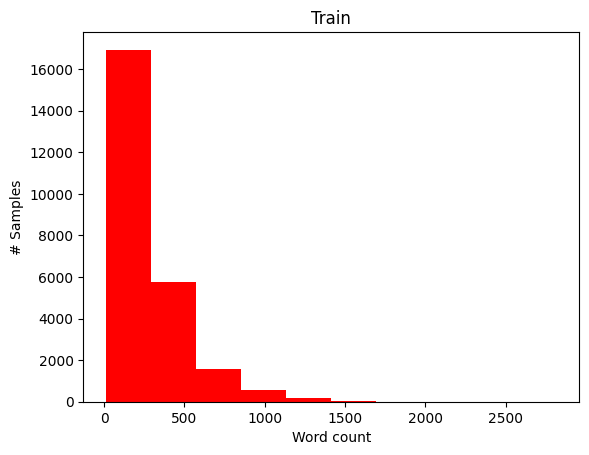

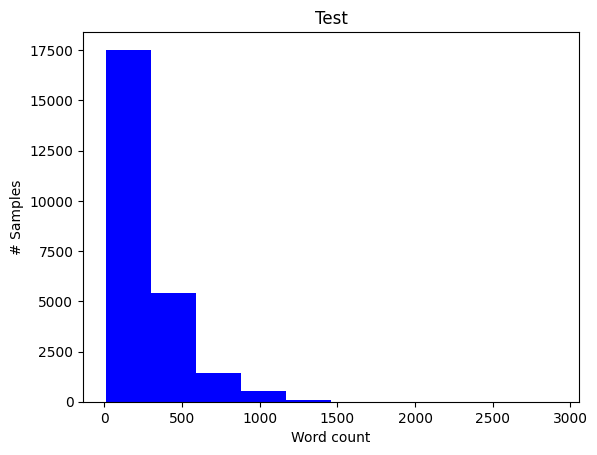

In [21]:
plot1 = plt.figure(1)
plt.hist(train_lengths, color="red")
plt.xlabel('Word count')
plt.ylabel('# Samples')
plt.title("Train")

plot2 = plt.figure(2)
plt.hist(test_lengths, 10, color="blue")
plt.xlabel('Word count')
plt.ylabel('# Samples')
plt.title("Test")

plt.show()

## 2. Feature Extraction

We are now ready to address the sentiment analysis task.

We consider the sentiment classification task for description purposes.

We first **determine** the inputs and outputs of our classifier.

Then, we define **how to encode** the inputs and outputs for the classifier.

### Inputs and Outputs

<center>
    <img src="images/inputs_outputs.png" alt="inputs and outputs" />
</center>

### Input features and Outputs

We will encode input text into a numerical format: **bag-of-words**.

<center>
    <img src="images/inputs_outputs_features.png" alt="features and outputs" />
</center>

Sentiment score prediction has the same schema where the *output label* is replaced by the sentiment score.

### 2.1 Bag-of-Words Encoding

The [scikit-learn](https://scikit-learn.org/stable/) library offers *TfidfVectorizer*, a class that performs both tokenization and the creation of the Bag-of-Words (BoW) representation of a corpus.

In particular, it computes tf-idf representation for each word token.

#### Homework 📖

The class has plenty of options: it can be used also to count n-grams, excluding stop-words, and cutting off most and/or less frequent terms.

In [22]:
from sklearn.feature_extraction.text import  TfidfVectorizer

# select only the training sentences
df_train = df.loc[df['split'] == "train"]

train_texts = df_train.text.values

print("Processing corpus\n")
vectorizer =  TfidfVectorizer()

# tokenization and creation of Bag of Words representation
X_train = vectorizer.fit_transform(train_texts)

print("Shape of the matrix: (data points, features)")
print(X_train.shape)
print()

# targets for the training set
Y_train = df_train.sentiment.values

Processing corpus

Shape of the matrix: (data points, features)
(25000, 74849)



The vectorizer **fits** on the provided texts to create an internal vocabulary.

The vocabulary is used to create the BoW representation.

The vocabulary is a dictionary that associates to each word a corresponding column in the feature matrix.

#### Homework 📖

Do not try to print the whole vocabulary: it is quite large ;)

Still, **it is very important** to have a look at detected tokens!

Let's check the size of the built vocabulary.

In [23]:
print("Size of vocabulary:")
print(len(vectorizer.vocabulary_))
print(type(vectorizer.vocabulary_))

Size of vocabulary:
74849
<class 'dict'>


Since the vocabulary is quite big, the BoW representation of input texts is a *sparse* matrix (see [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html) for more info).

Simply put, a sparse matrix is represented as a dictionary of non-zero entries, where the keys are the matrix coordinates.

In [24]:
print(X_train)

  (0, 42633)	0.09439928450138294
  (0, 3197)	0.06069036732101229
  (0, 24608)	0.03679743688692955
  (0, 49147)	0.021629982945797252
  (0, 66658)	0.032703777056988896
  (0, 44285)	0.08185652361156243
  (0, 35787)	0.016849658149890555
  (0, 30348)	0.050860134794092626
  (0, 53749)	0.02705927169754968
  (0, 30212)	0.03555050490074074
  (0, 9898)	0.05735492632985938
  (0, 6451)	0.08185652361156243
  (0, 28216)	0.02816542980900981
  (0, 34079)	0.029432797154011044
  (0, 33225)	0.04314688243621702
  (0, 45565)	0.07503663041437851
  (0, 39372)	0.031166119834444284
  (0, 17879)	0.03644676644536625
  (0, 10998)	0.04657556318440924
  (0, 36560)	0.03798340630440185
  (0, 35482)	0.04067830071635223
  (0, 26975)	0.04709406224849842
  (0, 15280)	0.0613692623825524
  (0, 59901)	0.032288273565331364
  (0, 21041)	0.0410312479486609
  :	:
  (24999, 44147)	0.06213193221986491
  (24999, 47142)	0.03924632503979708
  (24999, 41519)	0.07370675784072916
  (24999, 30118)	0.06531638026238287
  (24999, 4465)	0.0

It is possible to get the dense representation of a feature matrix.

**Keep in mind** that the matrix will occupy a lot of memory.

In [ ]:
print(X_train.toarray())

#### Homework 📖

Try taking a subset of the matrix and inspect its dense representation.

We use our fitted Vectorizer to transform test texts as well.

**Make sure** you invoke ``vectorizer.transform()`` and **not** ``vectorizer.fit_transform()``.

In [25]:
# select only the test sentences
df_test = df.loc[df['split'] == "test"]
test_texts = df_test.text.values

X_test = vectorizer.transform(test_texts)
Y_test = df_test.sentiment.values

**GOLDEN RULE: DO NOT EVER EVER EVER EVER MESS WITH THE TEST SET!!!!**

You **should never** add or remove rows/instances/data points from the test set.

You **should never** alter the ground-truth labels.

You **can** process it to transform, add, or remove columns/features.

You **can** modify the train set more freely.


But **keep your gross fingerprints** from the test set: it is untouchable, whatever its quality.

<br/>

<center>
    <img src="https://media.tenor.com/rPtHkeV2tkYAAAAC/stay-away-coronavirus.gif" alt="features and outputs" />
</center>

So far, we have encoded the text as it is.

We can perform additional pre-processing to 'normalize' the provided text.

### 2.2 Stemming

*''Stemming usually refers to a crude heuristic process that **chops off** the ends of words to reduce words to a common form.''* 

<div align='right'>
(Introduction to Information Retrieval ~ C. D. Manning)
</div>

**Example**

*programmer*, *programs*, *programming* $\rightarrow$ *program*

In [26]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize, WhitespaceTokenizer

# necessary for being able to tokenize
nltk.download('punkt')

stemmer = SnowballStemmer("english")
tokenizer = WhitespaceTokenizer()

[nltk_data] Downloading package punkt to /home/frgg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
def stem_text(text: str):
    words = [stemmer.stem(word) for word in tokenizer.tokenize(text)]
    return " ".join(words)

st_train_texts = [stem_text(text) for text in tqdm(train_texts)]
st_test_texts = [stem_text(text) for text in tqdm(test_texts)]

100%|███████████████████████████████████| 25000/25000 [00:23<00:00, 1064.06it/s]


In [28]:
print(train_texts[0][:100])
print()
print(st_train_texts[0][:100])

The first film had little ambition so nothing sticks to the screen. It was a bad version of 'Back to

the first film had littl ambit so noth stick to the screen. it was a bad version of back to the futu


We encoded the pre-processed texts as before via the ``TfidfVectorizer``.

In [29]:
print("Processing corpus\n")
st_vectorizer =  TfidfVectorizer()
st_X_train = st_vectorizer.fit_transform(st_train_texts)
st_X_test = st_vectorizer.transform(st_test_texts)

print("Shape of the matrix: (data points, features)")
print(st_X_train.shape)
print()

Processing corpus

Shape of the matrix: (data points, features)
(25000, 70363)



### 2.3 Lemmatization

*''Lemmatization usually refers to use a vocabulary and morphological analysis of words to return the base or dictionary form of a word, known as **lemma**''*

<div align='right'>
(Introduction to Information Retrieval ~ C. D. Manning)
</div>

**Example**

*saw*, *seen*, *sees* $\rightarrow$ *see*

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /home/frgg/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/frgg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/frgg/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
def get_wordnet_key(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return 'n'

def lem_text(text: str):
    tokens = tokenizer.tokenize(text)
    tagged = pos_tag(tokens)
    words = [lemmatizer.lemmatize(word, get_wordnet_key(tag)) for word, tag in tagged]
    return " ".join(words)

lem_train_texts = [lem_text(text) for text in tqdm(train_texts, leave=True, position=0)]
lem_test_texts = [lem_text(text) for text in tqdm(test_texts, leave=True, position=0)]

100%|████████████████████████████████████| 25000/25000 [01:40<00:00, 249.08it/s]


In [32]:
print(train_texts[40][:100])
print(lem_train_texts[40][:100])

I've watched the first 17 episodes and this series is simply amazing! I haven't been this interested
I've watch the first 17 episode and this series be simply amazing! I haven't be this interested in a


We encoded the pre-processed texts as before via the ``TfidfVectorizer``.

In [33]:
print("Processing corpus\n")
lem_vectorizer =  TfidfVectorizer()
lem_X_train = lem_vectorizer.fit_transform(lem_train_texts)
lem_X_test = lem_vectorizer.transform(lem_test_texts)

print("Shape of the matrix: (data points, features)")
print(lem_X_train.shape)
print()

Processing corpus

Shape of the matrix: (data points, features)
(25000, 70643)



## 3. Training and Evaluating a Classifier

We are now ready to try out some standard machine learning classifiers.

**But** first, we introduce some baselines.

#### The importance of defining good baselines

Good baselines are always needed to consistently evaluate employed models.

When proposing a novel model, good baselines are recent state-of-the-art models.

When proposing a benchmark, good baselines are general-purpose off-the-shelf models.

### 3.1 Baselines

The majority baseline always predicts the majority class.

The random baseline makes uniform random predictions.

Their performances will tell us how much difficult this task is.

In [34]:
from sklearn.dummy import DummyClassifier

majority_classifier = DummyClassifier(strategy="prior")
uniform_classifier = DummyClassifier(strategy="uniform")

majority_classifier.fit(X_train, Y_train)
uniform_classifier.fit(X_train, Y_train)

Y_pred_train_maj = majority_classifier.predict(X_train)
Y_pred_test_maj = majority_classifier.predict(X_test)
Y_pred_train_uni = uniform_classifier.predict(X_train)
Y_pred_test_uni = uniform_classifier.predict(X_test)

#### Homework 📖

Try out a random baseline that samples predictions according to label distribution.

We now evaluate model predictions via some metrics.

In [35]:
from sklearn.metrics import classification_report

def evaluate_classification(y_true, y_pred):
    report = classification_report(y_true, y_pred, target_names=['neg', 'pos'])
    print(report)

In [36]:
evaluate_classification(y_true=Y_train, y_pred=Y_pred_train_maj)
evaluate_classification(y_true=Y_test, y_pred=Y_pred_test_maj)

              precision    recall  f1-score   support

         neg       0.50      1.00      0.67     12500
         pos       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000

              precision    recall  f1-score   support

         neg       0.50      1.00      0.67     12500
         pos       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/home/frgg/deasy_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frgg/deasy_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frgg/deasy_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frgg/deasy_env/lib/python3.7/si

In [37]:
evaluate_classification(y_true=Y_train, y_pred=Y_pred_train_uni)
evaluate_classification(y_true=Y_test, y_pred=Y_pred_test_uni)

              precision    recall  f1-score   support

         neg       0.50      0.50      0.50     12500
         pos       0.50      0.50      0.50     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000

              precision    recall  f1-score   support

         neg       0.50      0.51      0.50     12500
         pos       0.50      0.50      0.50     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



#### 3.1.1 The importance of model evaluation

In most cases, accuracy is **not a very informative metric**. 

Precision, recall, and F1 are more informative

F1 is generally a good indicator. In particular, macro F1 in case the test set in unbalanced.

Whether precision or recall are more important depends on the specific application, if the priority is to avoid false positives or false negatives.

Other metrics do exists (e.g., Area Under ROC Curve), always check the literature to find the most informative way to measure something!

#### Homework 📖

Try sampling an unbalanced test set and run model evaluation.

Do you see any differences in terms of metric values?

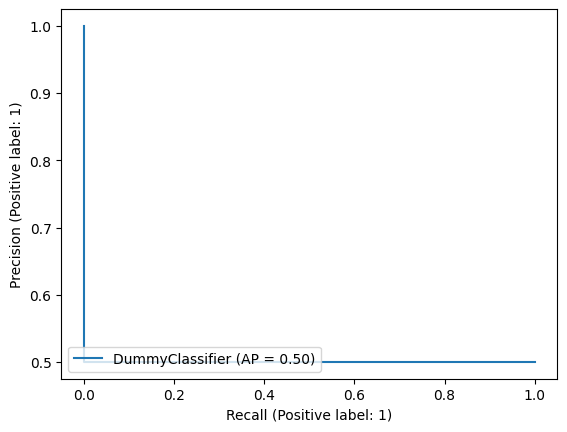

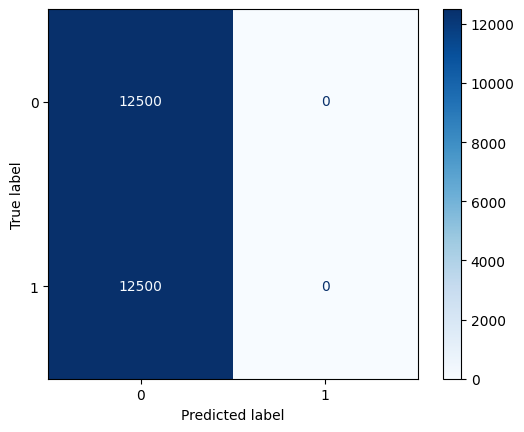

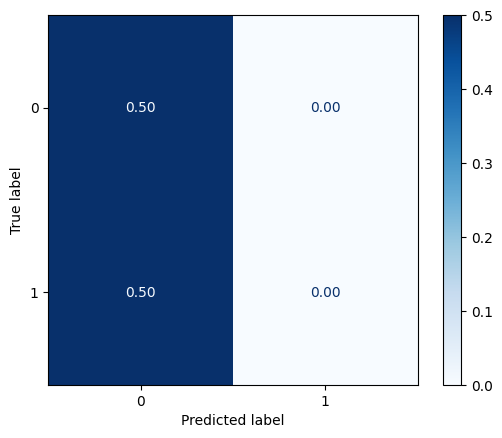

In [38]:
# plot precision/recall curve and confusion matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(majority_classifier, X_test, Y_test)
ConfusionMatrixDisplay.from_estimator(majority_classifier, X_test, Y_test, normalize=None, cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_estimator(majority_classifier, X_test, Y_test, normalize='all', cmap=plt.cm.Blues, values_format=".2f")

In most cases it is better to use the normalized version, especially with unbalanced distributions!

Looking at confusion tables row-wise gives information about recall, looking column-wise gives information about precision.

<center>
    <img src="images/confusion_matrix.png" alt="confusion matrix" />
</center>

<div align='right'>
(wikipedia)
</div>

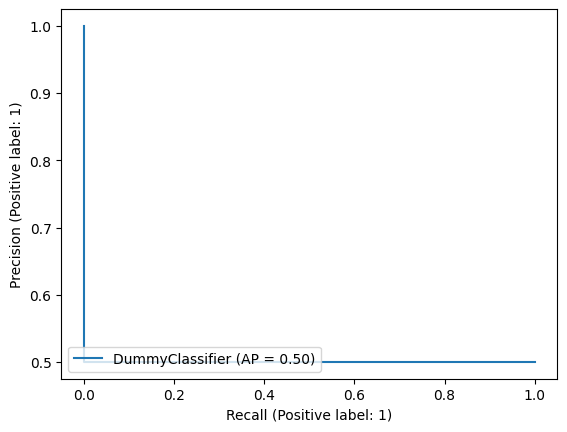

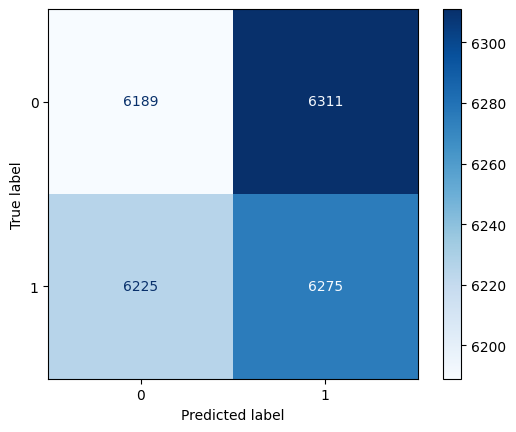

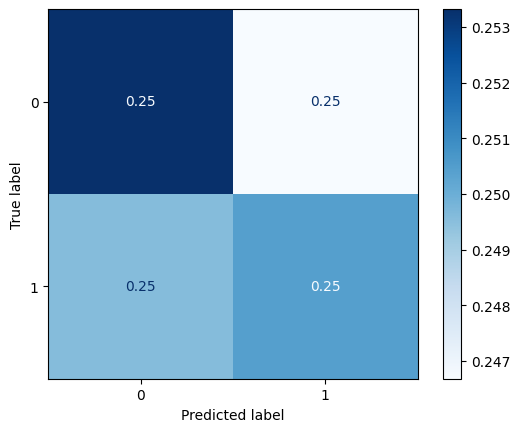

In [39]:
PrecisionRecallDisplay.from_estimator(uniform_classifier, X_test, Y_test)
ConfusionMatrixDisplay.from_estimator(uniform_classifier, X_test, Y_test, normalize=None, cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_estimator(uniform_classifier, X_test, Y_test, normalize='all', cmap=plt.cm.Blues, values_format=".2f")

### 3.2 SVC Classifier

Let's try our first classifier: a Support Vector Machine (SVM).

In [40]:
from sklearn.svm import LinearSVC, SVC

svc_classifier = LinearSVC()

svc_classifier.fit(X_train, Y_train)

Y_pred_train_svc = svc_classifier.predict(X_train)
Y_pred_test_svc = svc_classifier.predict(X_test)

In [41]:
evaluate_classification(y_true=Y_train, y_pred=Y_pred_train_svc)
evaluate_classification(y_true=Y_test, y_pred=Y_pred_test_svc)

              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     12500
         pos       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

              precision    recall  f1-score   support

         neg       0.87      0.89      0.88     12500
         pos       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



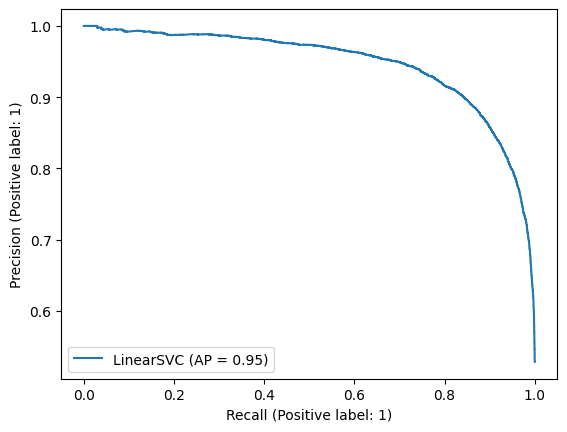

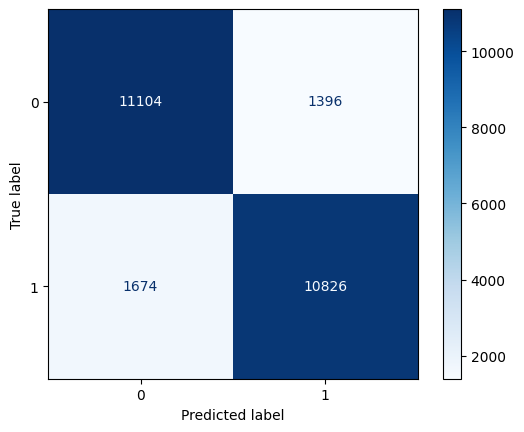

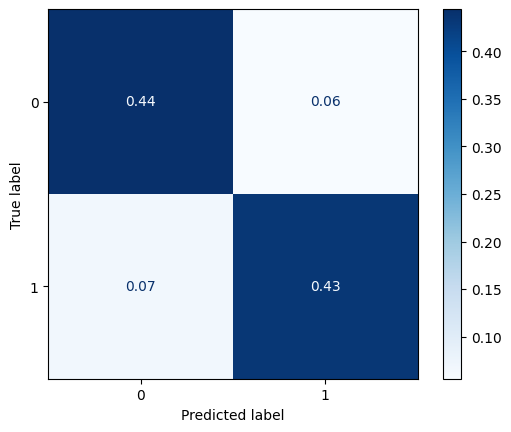

In [42]:
PrecisionRecallDisplay.from_estimator(svc_classifier, X_test, Y_test)
ConfusionMatrixDisplay.from_estimator(svc_classifier, X_test, Y_test, cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_estimator(svc_classifier, X_test, Y_test, normalize='all', cmap=plt.cm.Blues, values_format=".2f")

### 3.3 Error Analysis

Let's try to understand what kind of errors are done by the model. 

We can look at specific cases of error.

In [43]:
# confidence of the model
confidence = svc_classifier.decision_function(X_test)

fp_i = []
fn_i = []
fp_v = []
fn_v = []
fp_c = []
fn_c = []

for index, value in enumerate(Y_test):
    # false positives
    if value==0 and Y_pred_test_svc[index]==1:
        fp_i.append(index)
        fp_v.append(value)
        fp_c.append(confidence[index])
    # false negatives
    elif value==1 and Y_pred_test_svc[index]==0:
        fn_i.append(index)
        fn_v.append(value)
        fn_c.append(confidence[index])

Let's print some examples of FN and FP and the confidence in their classification

In [45]:
print("FN")

for index in [0, 3]:
    print(test_texts[fn_i[index]])
    print(fn_c[index])
    print()

FN
Here we've got an intelligent mixture of typical hongkongmovieshootouts, worlddestructionthemes and intelligent filmmaking. Not that the script has not its big holes and a few specialeffects are a bit cheaplooking. But the cinematography is a optical treat and the soundtrack is first rate. The blend of fast actionsequences and colorful slow, sometimes nearly poetic parts, has no comparison in its kind of movie, so a classification is rather hard. The closest genre is a disaster or terroristmovie with deeper human and political notes than usual. Well worth to be seen worldwide in cinemas. But i am hoping this for so many other (mostly asian) movies before and nobody seems to believe me. Unfortunately.
-0.010440413905536919

The Child's Play series isn't a favourite of mine, but Bride Of Chucky is actually an okay movie. This time we have two dolls Chucky and his former girlfriend (when he was human) Tiffany. Together they go on a journey to find an object. There are a few interesting

In [46]:
print("FP")

for index in [0, 6]:
    print(test_texts[fp_i[index]])
    print(fp_c[index])
    print()

FP
A female ex-cop who was drummed out of the force for recklessness (and who could probably beat Chuck Norris in a fight) hires herself out as a private bodyguard; her first client is a worthless playboy type. It takes half the movie for her to get kicked off the force in the first place. Lots of great fight choreography but the plot is strictly by the numbers, and the acting is as wooden as the dialogue. Give this one a miss.
0.07198102470929368

I had high hopes for this one after reading earlier reviews but it was so slow and the plot so basic that well I wondered if I had read the wrong reviews. <br /><br />Please, a boy meets girl next door at 11 and both aspire to love and being basketball legends. Grow apart, but watch each others progress. Guess what! Both get scholarships to same university and become lovers again until his father is caught out playing around with a younger woman. Our young hero unable to cope has lapse in court concentration but some how decides to go pro an

We now check the sentences for which the classification error is bigger.

In [47]:
max_fp = fp_c.index(max(fp_c))
print(test_texts[fp_i[max_fp]])
print(fp_c[max_fp])

print()

# for false negatives the confidence is negative
max_fn = fn_c.index(min(fn_c))
print(test_texts[fp_i[max_fn]])
print(fn_c[max_fn])

This movie was pure genius. John Waters is brilliant. It is hilarious and I am not sick of it even after seeing it about 20 times since I bought it a few months ago. The acting is great, although Ricki Lake could have been better. And Johnny Depp is magnificent. He is such a beautiful man and a very talented actor. And seeing most of Johnny's movies, this is probably my favorite. I give it 9.5/10. Rent it today!
2.070317458916407

This is the first porn I've ever tried to review. It demands a different approach than usual, since the allegory will not reward dissection. "I'm American. I'm a prudish virgin." "We are European. We are cultured and sex-mad." "It is nice when we all screw each other." Lots to talk about! Well, there kind of is in fact, relative to your average 60s topless volleyball number anyway. And the enervating patina of 'class' at least delivers clean, detailed compositions. But what the hell kind of thing is that to say about a porn? OK then: the only scene I really (

Let's now consider the stemmed and lemmatized versions of our input features.

In [48]:
svc_classifier_st = LinearSVC()

svc_classifier_st.fit(st_X_train, Y_train)

Y_pred_train_svc_st = svc_classifier_st.predict(st_X_train)
Y_pred_test_svc_st = svc_classifier_st.predict(st_X_test)

In [49]:
evaluate_classification(y_true=Y_train, y_pred=Y_pred_train_svc_st)
evaluate_classification(y_true=Y_test, y_pred=Y_pred_test_svc_st)

              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     12500
         pos       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

              precision    recall  f1-score   support

         neg       0.87      0.88      0.87     12500
         pos       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [50]:
svc_classifier_lem = LinearSVC()

svc_classifier_lem.fit(lem_X_train, Y_train)

Y_pred_train_svc_lem = svc_classifier_lem.predict(lem_X_train)
Y_pred_test_svc_lem = svc_classifier_lem.predict(lem_X_test)

In [51]:
evaluate_classification(y_true=Y_train, y_pred=Y_pred_train_svc_lem)
evaluate_classification(y_true=Y_test, y_pred=Y_pred_test_svc_lem)

              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     12500
         pos       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

              precision    recall  f1-score   support

         neg       0.86      0.88      0.87     12500
         pos       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



### 3.3.1 Comparisons

Let's organize our results in a Table to better compare models.

| Model       | F1-macro |
| ---         | ---      |
| Random      | .50      |
| Majority    | .33      |
| SVM         | **.88**      |
| SVM w/ Stem | .87      |
| SVM w/ Lem  | .87      |

## 4. Sentiment Score Prediction

We now address sentiment score prediction task.

Given a text review, a model predicts the score assigned by the reviewer.

We first extract ground-truth scores.

In [52]:
Y_train = df_train.score.values
Y_test = df_test.score.values

### 4.1 Baselines

As done for sentiment analysis, we first define some baselines to better assess model performance.

In [53]:
from sklearn.dummy import DummyClassifier

maj_classifier = DummyClassifier(strategy="prior")
uni_classifier = DummyClassifier(strategy="uniform")

maj_classifier.fit(X_train, Y_train)
uni_classifier.fit(X_train, Y_train)

Y_pred_train_maj = maj_classifier.predict(X_train)
Y_pred_train_uni = uni_classifier.predict(X_train)

Y_pred_test_maj = maj_classifier.predict(X_test)
Y_pred_test_uni = uni_classifier.predict(X_test)

We then introduce some regression metrics for model evaluation.

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

def evaluate_regression(y_true, y_pred):
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    
    print(f'R2 score: {r2}')
    print(f'MAE score: {mae}')
    print(f'MSE score: {mse}')

We first evaluate the majority baseline.

In [55]:
evaluate_regression(y_true=Y_train, y_pred=Y_pred_train_maj)
evaluate_regression(y_true=Y_test, y_pred=Y_pred_test_maj)

R2 score: -1.668608834962976
MAE score: 4.47772
MSE score: 32.06596
R2 score: -1.671340470653368
MAE score: 4.51296
MSE score: 32.55272


We then evaluate the random baseline.

In [56]:
evaluate_regression(y_true=Y_train, y_pred=Y_pred_train_uni)
evaluate_regression(y_true=Y_test, y_pred=Y_pred_test_uni)

R2 score: -0.8712176002808503
MAE score: 3.80692
MSE score: 22.48452
R2 score: -0.8557035311547452
MAE score: 3.81504
MSE score: 22.61344


### 4.2 Logistic Regression

Let's try our first regressor: Logistic Regression (LR)

In [57]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(max_iter=1000)

classifier_lr.fit(X_train, Y_train)

Y_pred_train_lr = classifier_lr.predict(X_train)
Y_pred_test_lr = classifier_lr.predict(X_test)

In [58]:
evaluate_regression(y_true=Y_train, y_pred=Y_pred_train_lr)
evaluate_regression(y_true=Y_test, y_pred=Y_pred_test_lr)

R2 score: 0.7207752514281693
MAE score: 0.76428
MSE score: 3.35516
R2 score: 0.484302858891708
MAE score: 1.46864
MSE score: 6.28424


We also evaluate LR on the stemmed and lemmatized input texts.

In [59]:
classifier_lr_st = LogisticRegression(max_iter=1000)

classifier_lr_st.fit(st_X_train, Y_train)

Y_pred_train_lr_st = classifier_lr_st.predict(st_X_train)
Y_pred_test_lr_st = classifier_lr_st.predict(st_X_test)

In [60]:
evaluate_regression(y_true=Y_train, y_pred=Y_pred_train_lr_st)
evaluate_regression(y_true=Y_test, y_pred=Y_pred_test_lr_st)

R2 score: 0.6976660321410337
MAE score: 0.81988
MSE score: 3.63284
R2 score: 0.470463927552914
MAE score: 1.49288
MSE score: 6.45288


In [61]:
classifier_lr_lem = LogisticRegression(max_iter=1000)

classifier_lr_lem.fit(lem_X_train, Y_train)

Y_pred_train_lr_lem = classifier_lr_lem.predict(lem_X_train)
Y_pred_test_lr_lem = classifier_lr_lem.predict(lem_X_test)

In [62]:
evaluate_regression(y_true=Y_train, y_pred=Y_pred_train_lr_lem)
evaluate_regression(y_true=Y_test, y_pred=Y_pred_test_lr_lem)

R2 score: 0.7027193013542103
MAE score: 0.8042
MSE score: 3.57212
R2 score: 0.47385801080820644
MAE score: 1.48528
MSE score: 6.41152


### 4.3 Stochastic Gradient Descend Regression

We consider another regressor: SGD Regression.

In [63]:
from sklearn.linear_model import SGDRegressor

classifier_sgd = SGDRegressor(max_iter=1000)

classifier_sgd.fit(X_train, Y_train)

Y_pred_train_sgd = classifier_sgd.predict(X_train)
Y_pred_test_sgd = classifier_sgd.predict(X_test)

In [64]:
evaluate_regression(y_true=Y_train, y_pred=Y_pred_train_sgd)
evaluate_regression(y_true=Y_test, y_pred=Y_pred_test_sgd)

R2 score: 0.6386561737671046
MAE score: 1.6974041080866813
MSE score: 4.341901490553871
R2 score: 0.5755637651767345
MAE score: 1.8678698267494085
MSE score: 5.1721426234660015


We also evaluate SGD on the stemmed and lemmatized input texts.

In [65]:
classifier_sgd_st = SGDRegressor(max_iter=1000)

classifier_sgd_st.fit(st_X_train, Y_train)

Y_pred_train_sgd_st = classifier_sgd_st.predict(st_X_train)
Y_pred_test_sgd_st = classifier_sgd_st.predict(st_X_test)

In [66]:
evaluate_regression(y_true=Y_train, y_pred=Y_pred_train_sgd_st)
evaluate_regression(y_true=Y_test, y_pred=Y_pred_test_sgd_st)

R2 score: 0.6299530668697775
MAE score: 1.716285207127116
MSE score: 4.4464778803151255
R2 score: 0.5699550708655515
MAE score: 1.880545728498865
MSE score: 5.2404896789923505


In [67]:
classifier_sgd_lem = SGDRegressor(max_iter=1000)

classifier_sgd_lem.fit(lem_X_train, Y_train)

Y_pred_train_sgd_lem = classifier_sgd_lem.predict(lem_X_train)
Y_pred_test_sgd_lem = classifier_sgd_lem.predict(lem_X_test)

In [68]:
evaluate_regression(y_true=Y_train, y_pred=Y_pred_train_sgd_lem)
evaluate_regression(y_true=Y_test, y_pred=Y_pred_test_sgd_lem)

R2 score: 0.6299640359194573
MAE score: 1.7167597448281882
MSE score: 4.446346076394048
R2 score: 0.569963978615122
MAE score: 1.8826923765130368
MSE score: 5.2403811299396255


### 4.4 Error Analysis

Let's look at model errors by framing the regression problem as a classification one.

In particular, we compute the confusion matrices.

For brevity, we only consider LR.

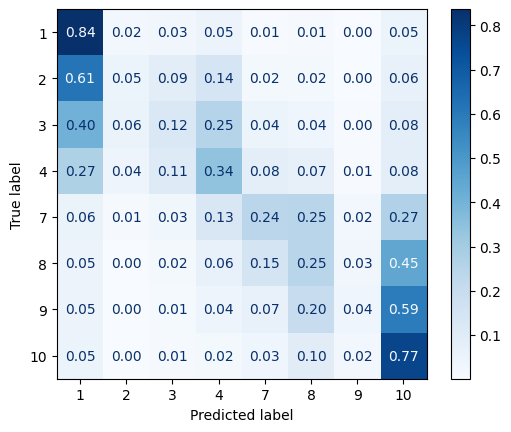

In [69]:
# differences between classes in recall
disp1 = ConfusionMatrixDisplay.from_estimator(classifier_lr, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])

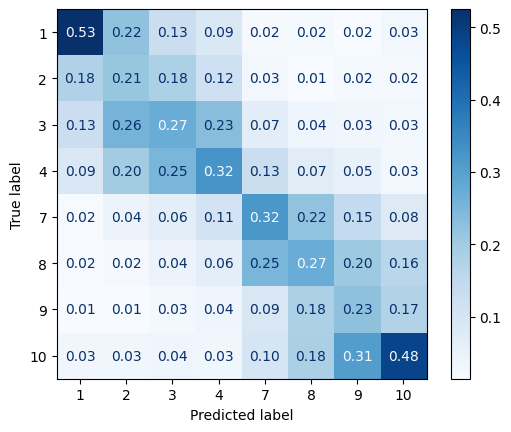

In [70]:
# difference between classes in precision
disp3 = ConfusionMatrixDisplay.from_estimator(classifier_lr, X_test, Y_test, normalize='pred', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])

#### Homework 📖

Perform error analysis with SGD as well.

Are there any differences with LR?

What about SGD w/ Stem and SGD w/ Lem?

#### 4.4.1 Comparisons

Lastly, we report regression results in a Table for better comparison.

| Model       | R2 $\uparrow$   |  MAE $\downarrow$ |  MSE $\downarrow$ |
| ---         | ---  | ---  | ---  |
| Random      | -0.83  |  .3.78 |  22.33 |
| Majority    | -1.67  |  .4.51 |  32.55 |
| LR          | .48  |  **1.47** |  6.28 |
| LR w/ Stem  | .47  |  1.49 |  6.45 |
| LR w/ Lem   | .47  |  1.49 |  6.41 |
| SGD          | **.58**  |  1.87 |  **5.17** |
| SGD w/ Stem  | .57  |  1.88 |  5.24 |
| SGD w/ Lem   | .57  |  1.88 |  5.24 |

# The End!